In [5]:
BASE_DIR = r"C:\Users\Aditya\Documents\GenAI\ImageCaptioning\data"
WORKING_DIR = r"C:\Users\Aditya\Documents\GenAI\ImageCaptioning"

In [1]:
import os
import numpy as np
from tqdm.notebook import tqdm
import pickle

In [28]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.layers import Input , Dense , LSTM , Embedding , Dropout , add
from tensorflow.keras.models import load_model

In [3]:
# Extracting image Features

# loading vgg16

model = VGG16()
model = Model(inputs=model.inputs , outputs = model.layers[-2].output)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
# extract features from image

features = {}
directory = os.path.join(BASE_DIR, "Images")


In [ ]:

for img_name in tqdm(os.listdir(directory)):
    img_path = directory + '/' + img_name
    image = load_img(img_path , target_size=(224,224))
    image = img_to_array(image)
    image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image , verbose=0)
    image_id = img_name.split('.')[0]
    features[image_id] = feature

In [ ]:
# save features

pickle.dump(features , open(os.path.join(WORKING_DIR , 'features_img.pkl') , 'wb'))

In [8]:
len(features)

8091

In [7]:
with open(os.path.join(WORKING_DIR , 'features_img.pkl') , 'rb') as f :
   features = pickle.load(f)

In [9]:
# load captions

with open(os.path.join(BASE_DIR , 'captions.txt') , 'r') as f :
    captions_doc = f.read()



In [10]:
# mapping img to caption

mapping = {}
for line in tqdm(captions_doc.split('\n')):
    # split by ','
    tokens = line.split(',')
    if len(line) < 2 :
        continue
    image_id , caption = tokens[0] , tokens[1]
    # rm extension - jpg
    image_id = image_id.split('.')[0]
    # caption list to string
    caption = "".join(caption)
    if image_id not in mapping :
        mapping[image_id] = []
    mapping[image_id].append(caption)


  0%|          | 0/40456 [00:00<?, ?it/s]

In [11]:
len(mapping)

8091

In [12]:
# preprocess txt data
#  
def clean(mapping):
    for key , captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]
            # to lower
            caption = caption.lower()
            # delete digits , sp chars
            caption = caption.replace('[^A-Za-z]','')
            # delete additional spaces
            caption = caption.replace('\s+' , ' ')
            # add start and end index
            caption = 'startseq ' + ' '.join([word for word in caption.split() if len(word) > 1]) + ' endseq'
            captions[i] = caption



<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Aditya\AppData\Local\Temp\ipykernel_23500\3187195918.py:12: SyntaxWarning: invalid escape sequence '\s'
  caption = caption.replace('\s+' , ' ')


In [13]:
# before preprocess

mapping["1007129816_e794419615"]

['A man in an orange hat starring at something .',
 'A man wears an orange hat and glasses .',
 'A man with gauges and glasses is wearing a Blitz hat .',
 'A man with glasses is wearing a beer can crocheted hat .',
 'The man with pierced ears is wearing glasses and an orange hat .']

In [14]:
clean(mapping)

In [15]:
mapping['1007129816_e794419615']

['startseq man in an orange hat starring at something endseq',
 'startseq man wears an orange hat and glasses endseq',
 'startseq man with gauges and glasses is wearing blitz hat endseq',
 'startseq man with glasses is wearing beer can crocheted hat endseq',
 'startseq the man with pierced ears is wearing glasses and an orange hat endseq']

In [66]:
# Save the dictionary to a file
with open('mapping.pkl', 'wb') as file:
    pickle.dump(mapping, file)

In [16]:
all_captions = []
for key in mapping :
    for caption in mapping[key]:
        all_captions.append(caption)

In [17]:
len(all_captions)

40455

In [18]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [19]:
# tokenize the text

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [20]:
vocab_size

8313

In [21]:
# get max len of caption

max_length = max(len(caption.split()) for caption in all_captions)
max_length 

31

In [67]:
# Save the variable to a file
with open('max_length.pkl', 'wb') as file:
    pickle.dump(max_length, file)

In [22]:
## Train Test Split

image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split :]

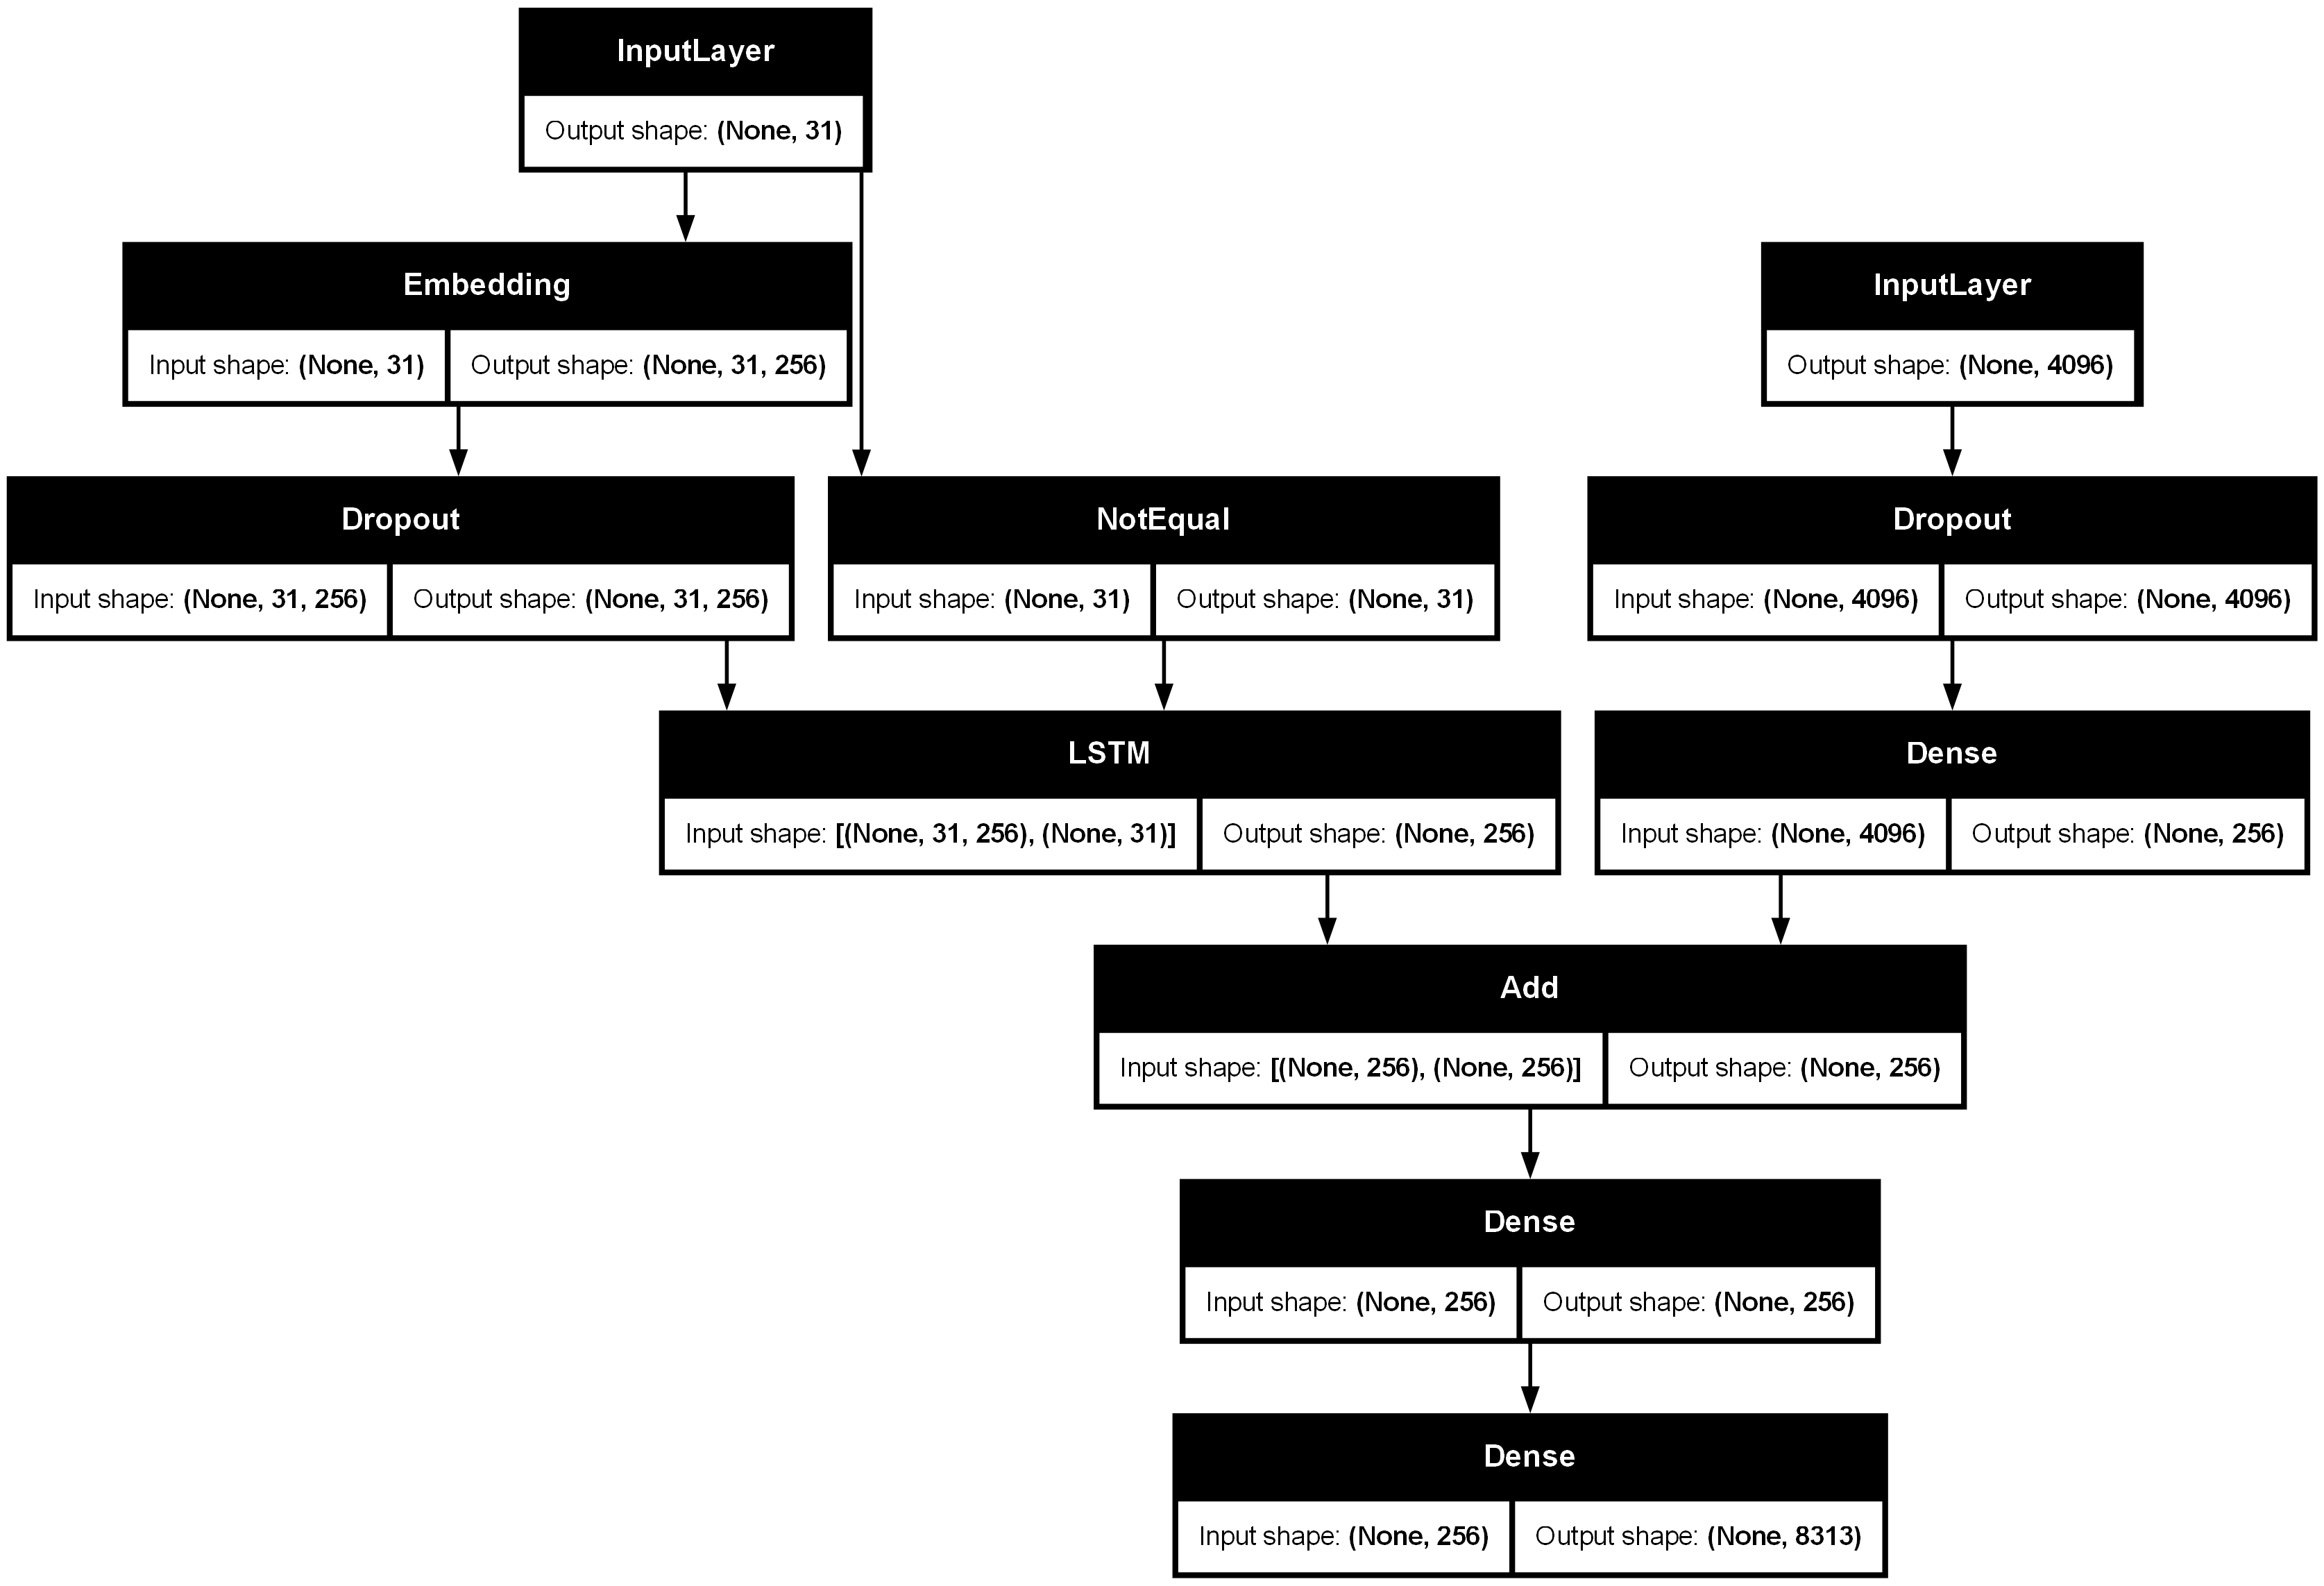

In [23]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,), name="image")
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,), name="text")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [24]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length, padding='post')[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], 	num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield {"image": X1, "text": X2}, y
                X1, X2, y = list(), list(), list()
                n = 0

In [25]:
# train the model
epochs = 30
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - loss: 5.7732
227/227 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - loss: 4.0272
227/227 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - loss: 3.5414
227/227 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - loss: 3.2596
227/227 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - loss: 3.0564
227/227 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - loss: 2.9043
227/227 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - loss: 2.7899
227/227 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - loss: 2.6983
227/227 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - loss: 2.6225
227/227 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - loss: 2.5593
227/227 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - loss: 2.5021
227/227 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - loss: 2.4456
227/227 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - loss: 2.3926
227/227 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - loss: 2.3435
227/227 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - loss: 2.3031
227/227 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - loss: 2.2572
227/227 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - loss: 2.2227
227/227 ━━━━━━━━━━━━━━━━━━━━ 38

In [26]:
model.save(WORKING_DIR + '/model_ep30_bs32.keras')

In [27]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text (InputLayer)   │ (None, 31)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image (InputLayer)  │ (None, 4096)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 31, 256)   │  2,128,128 │ text[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4096)      │          0 │ image[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 31, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 31)        │          0 │ text[0][0]        │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,048,832 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    525,312 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense[0][0],      │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8313)      │  2,136,441 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,713,517 (67.57 MB)

 Trainable params: 5,904,505 (22.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,809,012 (45.05 MB)

In [30]:
# Load the saved model
loaded_model_ep30 = load_model('model_ep30_bs32.keras')
print("Model loaded successfully!")

# Verify the model structure
loaded_model_ep30.summary()


Model loaded successfully!


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text (InputLayer)   │ (None, 31)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image (InputLayer)  │ (None, 4096)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 31, 256)   │  2,128,128 │ text[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4096)      │          0 │ image[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 31, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 31)        │          0 │ text[0][0]        │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,048,832 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    525,312 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense[0][0],      │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8313)      │  2,136,441 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,713,517 (67.57 MB)

 Trainable params: 5,904,505 (22.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,809,012 (45.05 MB)

In [31]:
def idx_to_word(integer , tokenizer):
    for word , index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [68]:
# Save the tokenizer to a file
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

In [32]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length, padding='post')
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

In [33]:
from nltk.translate.bleu_score import corpus_bleu


In [34]:
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    # calcuate BLEU score
    print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BLEU-1: 0.538462
BLEU-2: 0.211830
BLEU-1: 0.500000
BLEU-2: 0.301511
BLEU-1: 0.540541
BLEU-2: 0.333598
BLEU-1: 0.348485
BLEU-2: 0.198356
BLEU-1: 0.371795
BLEU-2: 0.214097
BLEU-1: 0.386364
BLEU-2: 0.237784
BLEU-1: 0.427083
BLEU-2: 0.285618
BLEU-1: 0.431193
BLEU-2: 0.277212
BLEU-1: 0.435897
BLEU-2: 0.276922
BLEU-1: 0.472868
BLEU-2: 0.295670
BLEU-1: 0.489051
BLEU-2: 0.311503
BLEU-1: 0.486486
BLEU-2: 0.299045
BLEU-1: 0.490446
BLEU-2: 0.303247
BLEU-1: 0.482143
BLEU-2: 0.290743
BLEU-1: 0.471910
BLEU-2: 0.284718
BLEU-1: 0.476190
BLEU-2: 0.282531
BLEU-1: 0.487562
BLEU-2: 0.286607
BLEU-1: 0.495327
BLEU-2: 0.305787
BLEU-1: 0.495575
BLEU-2: 0.301621
BLEU-1: 0.481481
BLEU-2: 0.293878
BLEU-1: 0.482490
BLEU-2: 0.289521
BLEU-1: 0.490566
BLEU-2: 0.294632
BLEU-1: 0.489209
BLEU-2: 0.290538
BLEU-1: 0.491349
BLEU-2: 0.295203
BLEU-1: 0.506711
BLEU-2: 0.319507
BLEU-1: 0.514754
BLEU-2: 0.329932
BLEU-1: 0.509615
BLEU-2: 0.324807
BLEU-1: 0.501529
BLEU-2: 0.317240
BLEU-1: 0.504532
BLEU-2: 0.319231
BLEU-1: 0.5000

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq cheerleader thrown into the air endseq
startseq group of cheerleaders are lifting up two other cheerleaders above their heads endseq
startseq "cheerleader on top of cheerleading pyramid endseq
startseq cheerleaders dressed in red and black hold two cheerleaders above their heads endseq
startseq two cheerleaders in red an black are standing on the shoulders of other cheerleaders in front of red curtain endseq
--------------------Predicted--------------------
startseq girl in pink vest performing martial arts endseq


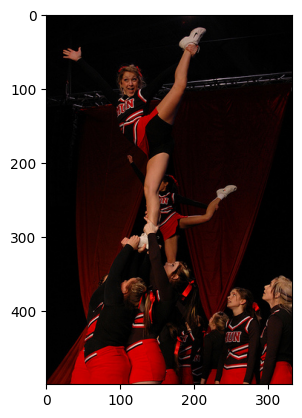

In [39]:
generate_caption("3193511842_82549c21fb.jpg")

---------------------Actual---------------------
startseq dog running through the snow with what appears to be chunk of wood in its mouth endseq
startseq white dog carries something in its mouth through the snow endseq
startseq white dog in the snow running with an object in its mouth endseq
startseq "a white dog runs over snowy field or lawn endseq
startseq white dog with purple necklace on plays in the snow endseq
--------------------Predicted--------------------
startseq white dog with white spot on his mouth is running through snow endseq


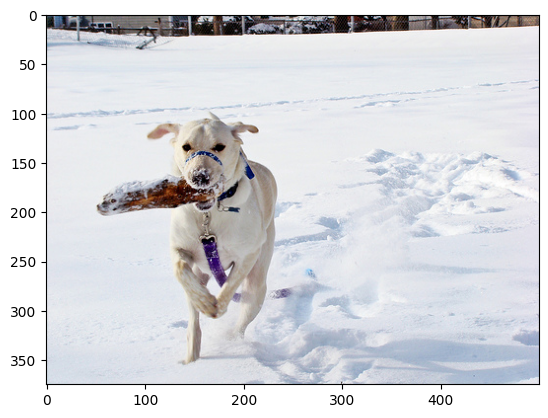

In [40]:
generate_caption("3197917064_e679a44b8e.jpg")

---------------------Actual---------------------
startseq guy skateboarding endseq
startseq skateboarder jumps into the air endseq
startseq skateboarder performs stunt endseq
startseq young man is jumping in the air with his skateboard endseq
startseq skateboard rider jumping high in the air on skateboard endseq
--------------------Predicted--------------------
startseq man skateboarding on trampoline endseq


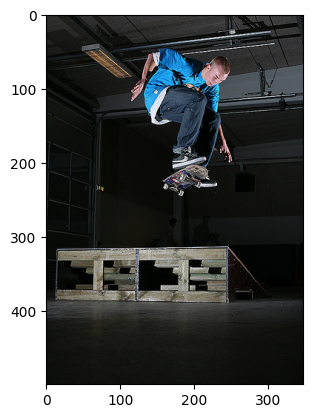

In [41]:
generate_caption("3209350613_eb86579ee8.jpg")

In [42]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
import numpy as np

# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet')
vgg16_model = Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)  # Use the penultimate layer

def extract_features_vgg16(image_path):
    """
    Extract features from an image using the pre-trained VGG16 model.
    
    Args:
    - image_path: Path to the image file.

    Returns:
    - feature_vector: A NumPy array containing the extracted feature vector.
    """
    image = load_img(image_path, target_size=(224, 224))  # Resize to VGG16 input size
    image_array = img_to_array(image)  # Convert to NumPy array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = preprocess_input(image_array)  # Preprocess for VGG16
    feature_vector = vgg16_model.predict(image_array, verbose=0)  # Extract features
    return feature_vector


In [43]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def generate_caption2(image_name):
    """
    Generate a caption for a given image.

    Args:
    - image_name: Name of the image file (e.g., "my_image.jpg").
    """
    # Load the image
    img_path = os.path.join(WORKING_DIR,image_name)
    image = Image.open(img_path)

    # Handle feature extraction
    image_id = image_name.split('.')[0]
    if image_id in features:  # Image is part of the dataset
        feature_vector = features[image_id]
    else:  # Image is not part of the dataset, extract features dynamically
        print("Image not found in dataset, extracting features dynamically...")
        feature_vector = extract_features_vgg16(img_path)
    
    # Display the actual captions if available
    if image_id in mapping:
        print('---------------------Actual---------------------')
        captions = mapping[image_id]
        for caption in captions:
            print(caption)
    else:
        print("No actual captions available for this image.")

    # Predict the caption
    print('--------------------Predicted--------------------')
    y_pred = predict_caption(model, feature_vector, tokenizer, max_length)
    print(y_pred)

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()


Image not found in dataset, extracting features dynamically...
No actual captions available for this image.
--------------------Predicted--------------------
startseq three women in dresses endseq


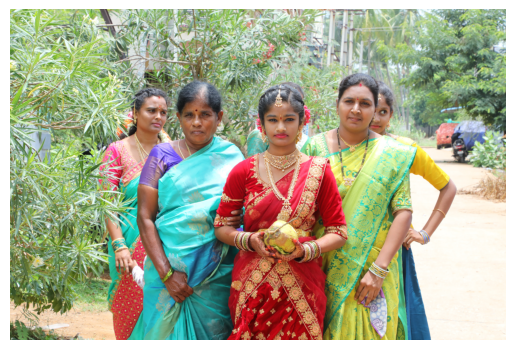

In [47]:
generate_caption2('pic4.jpg')

Image not found in dataset, extracting features dynamically...
No actual captions available for this image.
--------------------Predicted--------------------
startseq man wearing white helmet and helmet is wearing white helmet and pulling blue top endseq


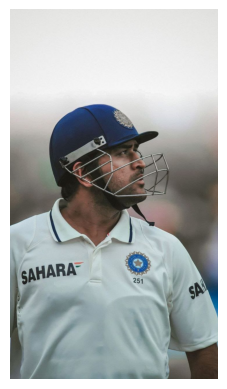

In [57]:
generate_caption2('pic8.jpg')

Image not found in dataset, extracting features dynamically...
No actual captions available for this image.
--------------------Predicted--------------------
startseq brown and white dog opens its mouth to catch ball endseq


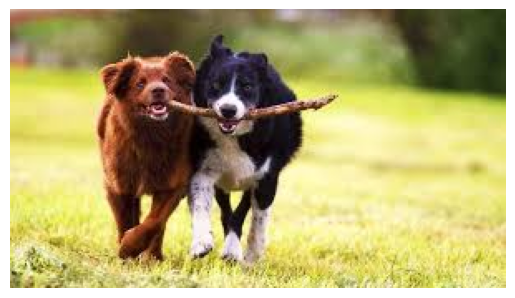

In [58]:
generate_caption2('pic11.jpg')

Image not found in dataset, extracting features dynamically...
No actual captions available for this image.
--------------------Predicted--------------------
startseq dog chews on its head endseq


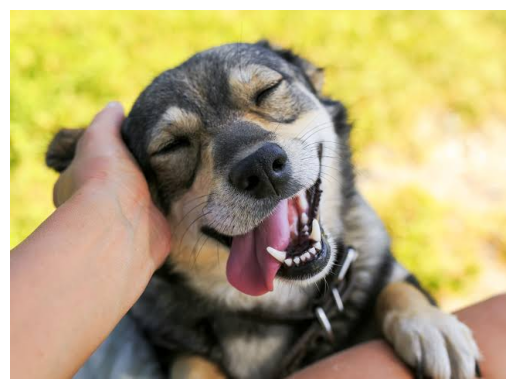

In [62]:
generate_caption2('pic15.jpg')